# Capstone Project - Customer Churn Prediction: Exploratory Data Analysis
- Exploratory Analysis of Telecom Customer Dataset

### Table of Contents
1. [Introduction and Project Goals](#Intro)
2. [Question of Interest](#Quest) <br>
3. [Exploratory Data Analysis](#EDA)<br>
    3.1 [Customer Demographics](#CD)<br>
    3.2 [Customer Account Information](#Ha)<br>
    3.3 [Customer Services](#Ir)<br>
4. [Summary](#sum)

# 1 Introduction and Project Goals
<a id = "Intro"></a>

> __Background__
<br>
The telecom industry continues to confront growing pricing pressure worldwide. While regional differences apply, wireless expansion is reaching a saturation point across multiple markers. In addition, the longstanding ability to diversify products and services based on handset selection and network quality is wearing off, and product lifecycles are shortening. Simultaneously, wireline businesses are facing competition from cable operators and a risking of disruption from The OTT ( Over-the-top media service) players. All of these powerful trends are forcing telecom companies to respond through more competitive offers, bundles, and price cuts. Hence, understanding the customer and product dynamic for a given telecom company is a crucial and prior step ahead.
<br/><br/>
__Goals__
<br>
This project aims to take advantage of the cleaned telecom dataset, to leverage the insights of churn from the customer demographics, customer account information and customer services.
<br/><br/>
> __Motivations__
<br/>
Answering the question would be a benefit to develop a comprehensive view of the customer and link that view to strategy to improve the services and retain the customer.

<br/><br/>
We will also be exploring related features to be considered in the modeling.
<br/><br/>
Data Source: https://www.kaggle.com/blastchar/telco-customer-churn

# 2 Questions of Interest
<a id = "Quest"></a>

> to initial the data storytelling journey, we will organize this notebook around the following questions of interest:
<br>
1. What's the churn percentage in this company given the dataset we have?
2. what's the churn percentage distributed in different class of gender? Does other customer demographics related to higher/low churn? and what might be the potential reason?
3. what information can be obtain from the customer account information? Dose churn people all have short life span with the company?
4. Does people all opt in the Phone Services and Internet Services? Does the choice of services improve the retention?
5. What services should the company try to improve? what services should the company recommend more to the customer?
<br/>

Now let's start to explore the data.

# 3 Exploratory Data Analysis
<a id = "EDA"></a>

In [128]:
# Import packages

import pandas as pd
import numpy as np
import researchpy as rp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns   
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [129]:
# Load the data
telco = pd.read_csv("telco_eda.csv") 

## 3.1 Customer Demographics
<a id = "CD"></a>

The Customer Demographics includes,<br><br>
    __`gender`__ : Whether the customer is a male or a female,<br> 
    __`Senior Citizen`__: Whether the customer is a senior citizen or not,<br>
    __`Partner`__: Whether the customer has a partner or not,<br>
    __`Dependents`__: Whether the customer has dependents or not.<br>

Let's take a look at the target feature. then we will check the churn difference within each customer demographics.


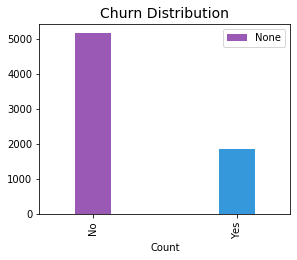

------- Churn Statistics -------
Churn Counts: 
No     5163
Yes    1869
Name: Churn, dtype: int64

Churn Percentage: 
No     0.734215
Yes    0.265785
Name: Churn, dtype: float64



In [130]:
# Plot the targt fearures
plt.figure(figsize = (4.5,3.5))
telco.groupby('Churn').size().plot(kind='bar', width=0.25, color=['#9b59b6', '#3498db'], legend= True)
plt.title('Churn Distribution', fontdict={'fontsize':14})
plt.xlabel('Count')
plt.show()  


# Print the Churn counts and percentage
print("------- Churn Statistics -------")
print("Churn Counts: \n{}\n".format(telco.Churn.value_counts()))
print("Churn Percentage: \n{}\n".format(telco.Churn.value_counts(normalize = True)))

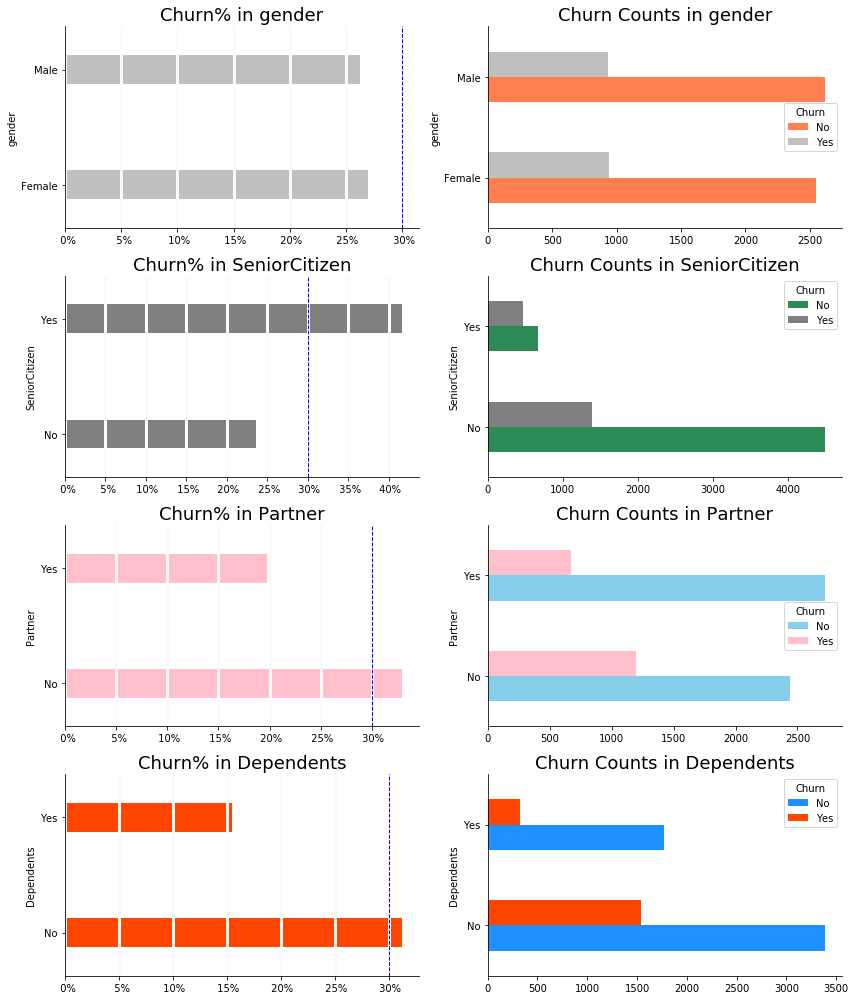

In [177]:
demographic = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
colors = [['coral', 'silver'], ['seagreen', 'grey'],['skyblue', 'pink'], ['dodgerblue', 'orangered']]
fig = plt.figure(figsize = (12,14))
i = 1
k=1
for col in demographic:
    crosstab = pd.crosstab([telco[col]], telco.Churn).apply(lambda r: 100*r/r.sum(), axis=1)
    ax = fig.add_subplot(4,2,i)
    crosstab.iloc[:,1].plot.barh(width = 0.25, color=colors[k-1][1] , ax= ax)
    ax.grid(True, which='major', axis='x', color=(250/255.0, 250/255.0, 250/255.0), linewidth=3, zorder=1)
    ax.axvline(x=30, color="blue", linestyle='--', linewidth=1)
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])
    ax.set_title('Churn% in '+ col, fontdict={'fontsize':18})
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    i += 2
    k += 1
    
j = 2
m = 1
for col in demographic:
    crosstab = pd.crosstab(telco[col], telco.Churn) 
    ax = fig.add_subplot(4,2,j)
    crosstab.plot.barh(stacked=False, legend=True, ax=ax, color = colors[m-5])
    ax.set_title('Churn Counts in '+ col, fontdict={'fontsize':18})
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    j += 2
    m += 1
    
plt.tight_layout()
plt.show()

In [167]:
# define the chi-square test function
def chi_square_test(feat):
    table, results = rp.crosstab(telco[col], telco.Churn, prop= 'col', test= 'chi-square')
    print("------- %s ------" % feat, "\nP-value = {}\n".format(results.iloc[1,1:][0]))
    print("<Cross Table> \n{}\n".format(table))
    
print ('\033[1m{:50s}\033[0m \n'.format("Chi-Square Test Results"))
for col in demographic:
    chi_square_test(col)

Chi-Square Test Results                            

------- gender ------ 
P-value = 0.4737

<Cross Table> 
         Churn                
Churn       No     Yes     All
gender                        
Female   49.27   50.24   49.53
Male     50.73   49.76   50.47
All     100.00  100.00  100.00

------- SeniorCitizen ------ 
P-value = 0.0

<Cross Table> 
               Churn                
Churn             No     Yes     All
SeniorCitizen                       
No              87.1   74.53   83.76
Yes             12.9   25.47   16.24
All            100.0  100.00  100.00

------- Partner ------ 
P-value = 0.0

<Cross Table> 
          Churn                
Churn        No     Yes     All
Partner                        
No        47.24   64.21   51.75
Yes       52.76   35.79   48.25
All      100.00  100.00  100.00

------- Dependents ------ 
P-value = 0.0

<Cross Table> 
             Churn                
Churn           No     Yes     All
Dependents                        
No          

### Summary

    - There's about 26% of the entire population that terminate their services with the company.
    - Male and female have similar churn percentage (~24%).
    - People who are senior citizen have higher churn percentage (42% vs 23%). 
    - People who have partner citizen have lower churn percentage (20% vs 34%).
    - People who have dependent have higher churn percentage (32% vs 15%). 
    - Chi - Square Test results reveals that gender and churn are not dependent.
    
    
    
    

## 3.2 Customer Account Information
<a id = "Ha"></a>

The Customer Account Information includes,<br><br>
    __`Tenure`__ : Number of months the customer has stayed with the company,<br> 
    __`Contract`__: The contract term of the customer,<br>
    __`Payment Method`__: The customer’s payment method,<br>
    __`Paperless Billing`__: Whether the customer has paperless billing or not,<br>
    __`Monthly Charge`__: The amount charged to the customer monthly,<br>
    __`Total Charge`__: The total amount charged to the customer.<br>

Let's take a look at the target feature. then we will check the churn difference within each customer Account features.

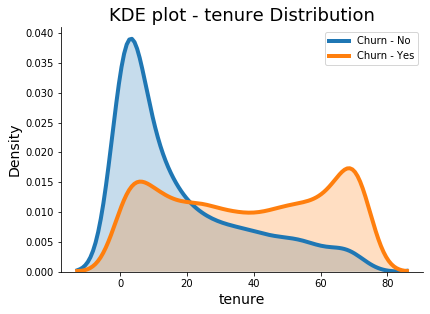

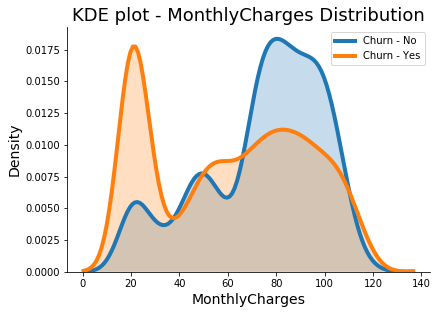

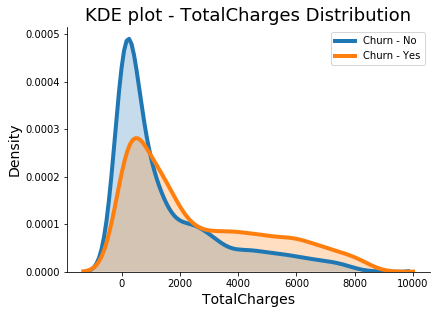

In [69]:
def kde_plot(col):
    fig = plt.figure(figsize = (6.5,4.5))
    #sns.kdeplot(data=telco.loc[:,col],label = 'Total', linewidth=4)
    ax = sns.kdeplot(data=telco.loc[:,col][telco.Churn == 'Yes'],label = 'Churn - No',linewidth=4, shade=True)
    ax = sns.kdeplot(data=telco.loc[:,col][telco.Churn == 'No'],label = 'Churn - Yes',linewidth=4, shade=True)
    plt.xlabel(col, fontdict={'fontsize':14})
    plt.ylabel('Density', fontdict={'fontsize':14})
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title("KDE plot - "+col+ " Distribution",fontdict={'fontsize':18})
    plt.show()
    
    
account_info_numeric =  ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in account_info_numeric:    
    kde_plot(col)


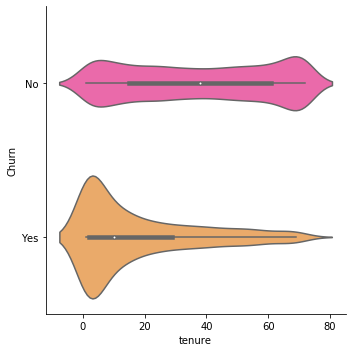

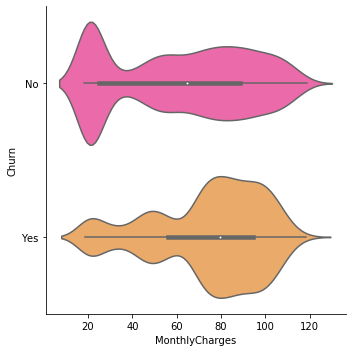

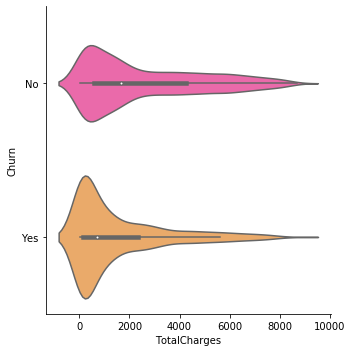

In [58]:
for col in account_info_numeric:
    sns.factorplot(y='Churn',x=col,data=telco,kind="violin",palette="spring")

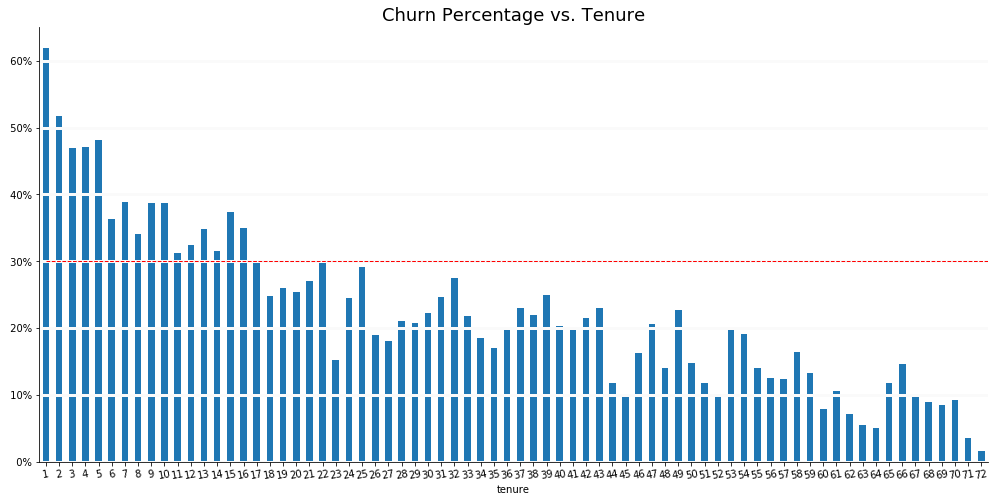

In [67]:
t=pd.DataFrame(telco.groupby(['tenure','Churn'])['Churn'].size())

cols = []
count = 1
for column in t.columns:
    if column == 'Churn':
        cols.append(f'count')
        continue
    cols.append(column)
t.columns = cols

t['percent'] = t.groupby(level=0).transform(lambda x: (100*x / x.sum()).round(2))
df = t.reset_index(level=['tenure','Churn'])
df.set_index('tenure', inplace=True)
churn_pct = df[df.Churn == 'Yes'].loc[:,'percent']

plt.figure(figsize = (17,8))
ax = churn_pct.sort_index(ascending=True).plot( kind = 'bar', zorder = 0)
ax.grid(True, which='major', axis='y', color=(250/255.0, 250/255.0, 250/255.0), linewidth=3, zorder=1)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals])
ax.set_title('Churn Percentage vs. Tenure', fontdict={'fontsize':18})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.hlines(y=30, color="red", linestyle='--', linewidth=1, xmin=0, xmax=72)
plt.xticks(rotation=10)
plt.show()

In [178]:
# define fucntion to draw boostrap sample
def draw_bs_reps(data, func, size):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, len(data)))
    return bs_replicates

# define fucntion to bootstaps two sample test
def bootstrap_two_sample_test(df, col):
    # Compute mean of all forces: mean_force
    mean = np.mean(df[col])
    data_a = df[df.Churn == 'Yes'][col]
    data_b = df[df.Churn == 'No'][col]
    empirical_diff_means = np.mean(data_b) - np.mean(data_a)
    # Generate shifted arrays
    a_shifted = data_a - np.mean(data_a) + mean
    b_shifted = data_b - np.mean(data_b) + mean 

    # Compute 10,000 bootstrap replicates from shifted arrays
    bs_replicates_a = draw_bs_reps(a_shifted, np.mean, 10000)
    bs_replicates_b = draw_bs_reps(b_shifted, np.mean, 10000)

    # Get replicates of difference of means: bs_replicates
    bs_replicates = bs_replicates_b - bs_replicates_a 

    # Compute and print p-value: p
    p = np.sum(bs_replicates > empirical_diff_means) / len(bs_replicates)
    return p

# perform test
print ('\033[1m{:50s}\033[0m \n'.format("Bootstrap hypothesis test for Churn vs. Non-Churn Group:"))
for col in account_info_numeric:
    p = bootstrap_two_sample_test(telco, col)
    print("Hypothesis Test of {:26}|".format(col), "p-value = {}".format(p))

Bootstrap hypothesis test for Churn vs. Non-Churn Group: 

Hypothesis Test of tenure                    | p-value = 0.0
Hypothesis Test of MonthlyCharges            | p-value = 1.0
Hypothesis Test of TotalCharges              | p-value = 0.0


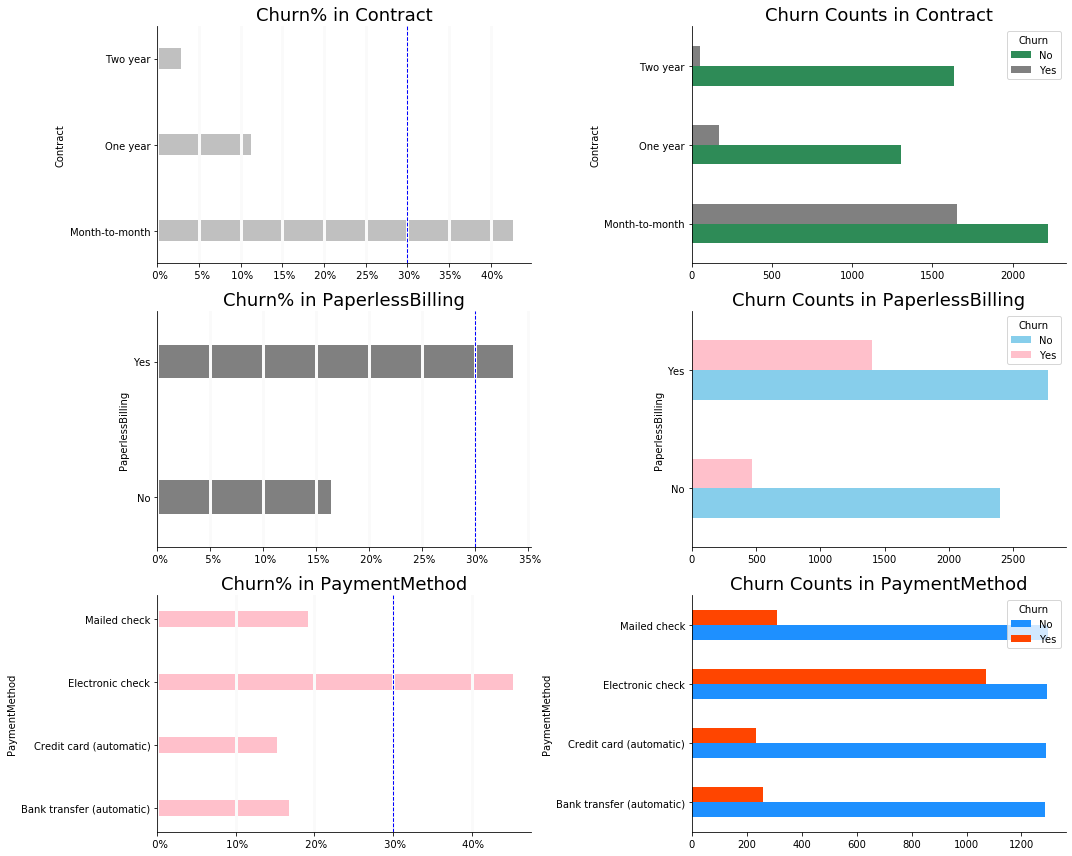

In [154]:
account_info = ['Contract', 'PaperlessBilling', 'PaymentMethod']
colors = [['coral', 'silver'], ['seagreen', 'grey'],['skyblue', 'pink'], ['dodgerblue', 'orangered']]
fig = plt.figure(figsize = (15,12))

i = 1
k = 1
for col in account_info:
    crosstab = pd.crosstab([telco[col]], telco.Churn).apply(lambda r: 100*r/r.sum(), axis=1)
    ax = fig.add_subplot(3,2,i)
    crosstab.iloc[:,1].plot.barh(width = 0.25 ,color=colors[k-1][1], ax= ax )
    ax.grid(True, which='major', axis='x', color=(250/255.0, 250/255.0, 250/255.0), linewidth=3, zorder=1)
    ax.axvline(x=30, color="blue", linestyle='--', linewidth=1)
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])
    #plt.xticks(rotation=30)
    ax.set_title('Churn% in '+ col, fontdict={'fontsize':18})
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    i += 2
    k += 1
    
j = 2
m = 1
for col in account_info:
    crosstab = pd.crosstab(telco[col], telco.Churn) 
    ax = fig.add_subplot(3,2,j)
    crosstab.plot.barh(stacked=False, ax=ax, legend=True, color = colors[m-4])
    ax.set_title('Churn Counts in '+ col, fontdict={'fontsize':18})
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    j += 2
    m += 1
    
plt.tight_layout()
plt.show()

In [51]:
print ('\033[1m{:50s}\033[0m \n'.format("Chi-Square Test Results"))
for col in account_info:
    chi_square_test(col)

Chi-Square Test Results                            

------- Contract ------ 
P-value = 0.0

<Cross Table> 
                 Churn                
Churn               No     Yes     All
Contract                              
Month-to-month   43.00   88.55   55.11
One year         25.30    8.88   20.93
Two year         31.71    2.57   23.96
All             100.00  100.00  100.00

------- PaperlessBilling ------ 
P-value = 0.0

<Cross Table> 
                   Churn                
Churn                 No     Yes     All
PaperlessBilling                        
No                 46.39   25.09   40.73
Yes                53.61   74.91   59.27
All               100.00  100.00  100.00

------- PaymentMethod ------ 
P-value = 0.0

<Cross Table> 
                            Churn                
Churn                          No     Yes     All
PaymentMethod                                    
Bank transfer (automatic)   24.87   13.80   21.93
Credit card (automatic)     24.97   12.41   21.6

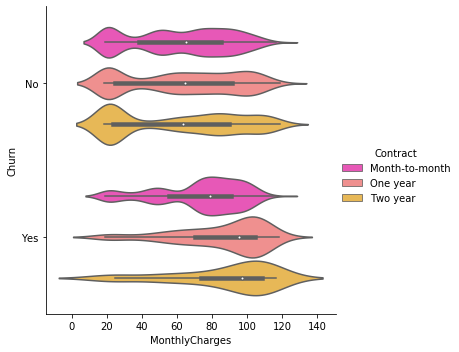

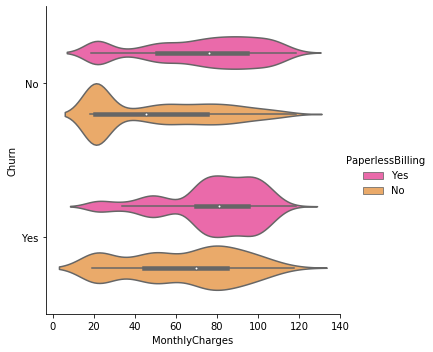

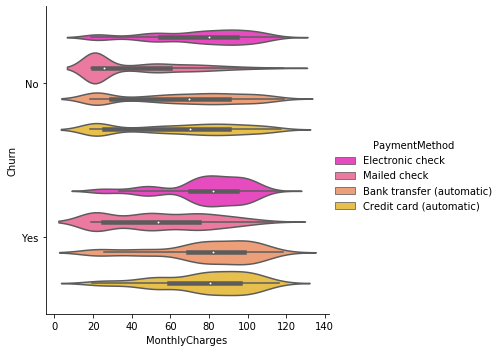

In [75]:
for col in account_info: 
    sns.factorplot(y='Churn',x="MonthlyCharges",hue=col, data=telco,kind="violin",palette="spring")

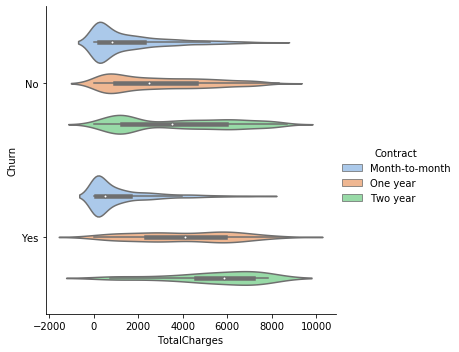

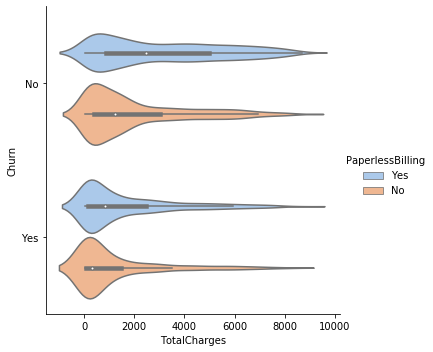

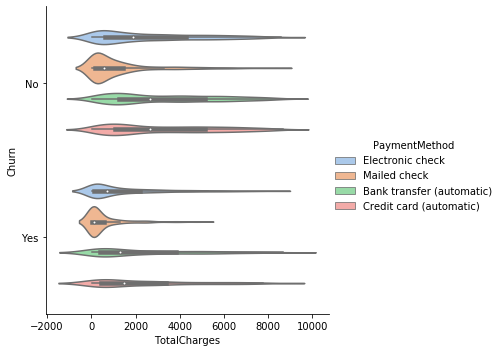

In [168]:
for col in account_info: 
    sns.factorplot(y='Churn',x="TotalCharges",hue=col, data=telco,kind="violin",palette="pastel")

### Summary
   - Surprisingly, the churn group have more people with longer tenure whereas non-churn group have more people with shorter tenure,
   - The churn percentage is decreasing along with the increase of tenure in general,
   - THe churn group have more people in lower monthly charge and more people in the total charge,
   - Month-to-month have the highest churn percentage (43% vs one year: 11% and 2 year: 2%) among all the contract type,
   - People choose paperless billing have higher churn percentage (30% vs 16%),
   - People choose electronic check have highest churn percentage (45%) over other payment method.
   - The churn group have higher charge in monthly charge for contract, paperless billing and payment method in general.
   - Bootstrap hypothesis testing indicates that mean Monthly charge is not statistically significant associated with churn.
   - Chi-square test indicates that the contract, paperless billing and payment method all are have statistically significant impact on the churn.

## 3.3 Customer Services
<a id = "Ir"></a>

The Customer Services includes,<br><br>
    __`Phone Service`__ : Whether the customer has a phone service or not,<br> 
    __`Multiple Lines`__: Whether the customer has multiple lines or not,<br>
    __`Internet Service`__: Customer’s internet service provider,<br>
    __`Online Security`__: Whether the customer has online security or not,<br>
    __`Online Backup`__: Whether the customer has online backup or not,<br>
    __`Device Protection`__: Whether the customer has device protection or not,<br>
    __`Tech Support`__: Whether the customer has tech support or not,<br>
    __`Streaming TV`__: Whether the customer has streaming TV or not,<br>
    __`Streaming Movies`__:	Whether the customer has streaming movies or not.<br>

Let's take a look at the target feature. then we will check the churn difference within each customer Services.


In [162]:
def seg_ct(name, col1, col2):
    crosstab = pd.crosstab([telco[col1], telco[col2]], telco.Churn)
    print("------- %s ------" % name)
    print("<Cross Table> \n{}\n".format(crosstab))

seg_ct('Phone Service break down', 'PhoneService', 'MultipleLines')

Internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection' , 'TechSupport' ,'StreamingTV', 'StreamingMovies']

for col in Internet:
    seg_ct('Internet Service break down', 'InternetService', col) 


------- Phone Service break down ------
<Cross Table> 
Churn                            No  Yes
PhoneService MultipleLines              
No           No phone service   510  170
Yes          No                2536  849
             Yes               2117  850

------- Internet Service break down ------
<Cross Table> 
Churn                                  No   Yes
InternetService OnlineSecurity                 
DSL             No                    893   347
                Yes                  1064   112
Fiber optic     No                   1143  1114
                Yes                   656   183
No              No internet service  1407   113

------- Internet Service break down ------
<Cross Table> 
Churn                                  No  Yes
InternetService OnlineBackup                  
DSL             No                    991  343
                Yes                   966  116
Fiber optic     No                    863  890
                Yes                   936  407
No  

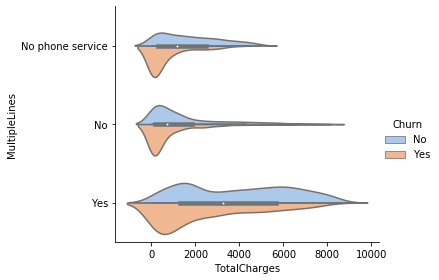

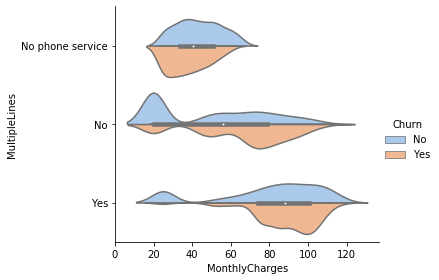

In [97]:
ax = sns.catplot(y="MultipleLines", x="TotalCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=telco, height=4, aspect=1.4)
ax = sns.catplot(y="MultipleLines", x="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=telco, height=4, aspect=1.4)

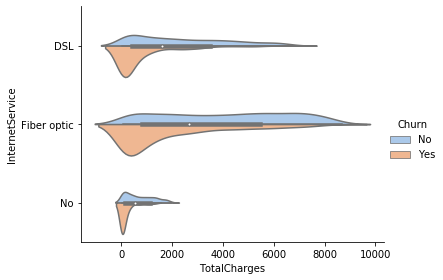

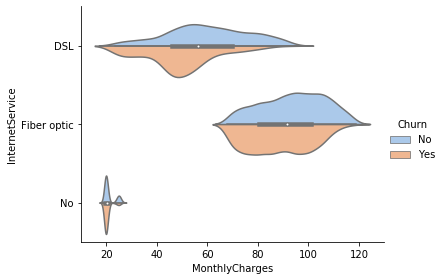

In [98]:
ax = sns.catplot(y="InternetService", x="TotalCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=telco, height=4, aspect=1.4);
ax = sns.catplot(y="InternetService", x="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=telco, height=4, aspect=1.4);

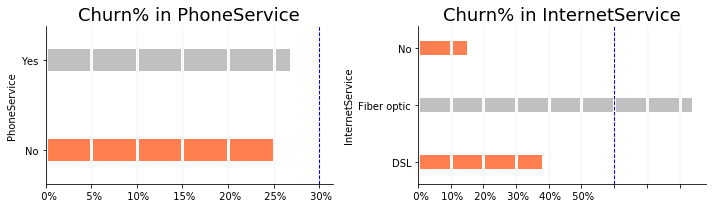

In [179]:
fig = plt.figure(figsize = (10,3))
i = 1
for col in ['PhoneService','InternetService']:
    crosstab = pd.crosstab([telco[col]], telco.Churn).apply(lambda r: 100*r/r.sum(), axis=1)
    ax = fig.add_subplot(1,2,i)
    ax = crosstab.iloc[:,1].plot.barh(width = 0.25, color=['coral', 'silver'])
    ax.grid(True, which='major', axis='x', color=(250/255.0, 250/255.0, 250/255.0), linewidth=3, zorder=1)
    plt.axvline(x=30, color="blue", linestyle='--', linewidth=1)
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])
    ax.set_title('Churn% in '+ col, fontdict={'fontsize':18})
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    i += 1
plt.tight_layout()

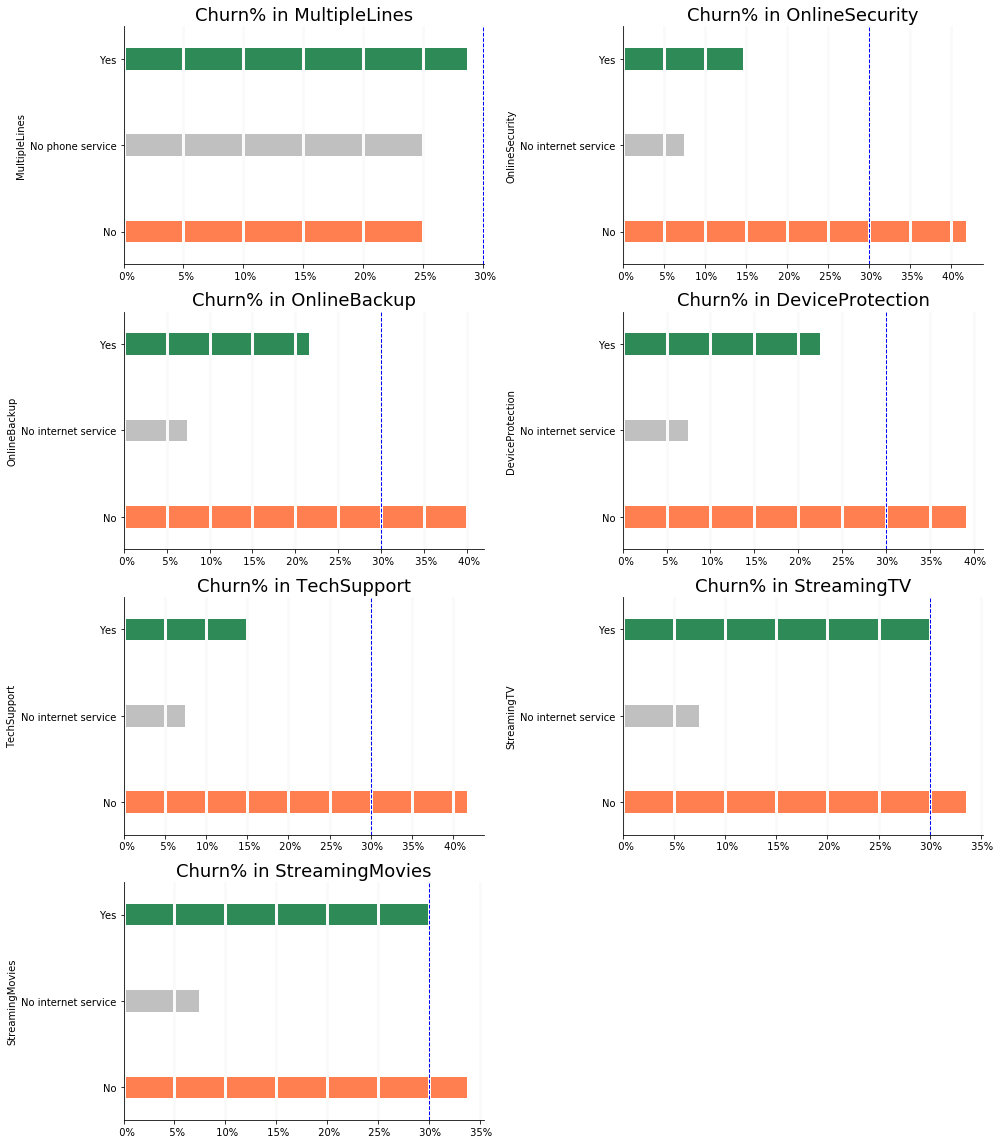

In [181]:
deatail_serive = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                  'DeviceProtection' , 'TechSupport' ,'StreamingTV', 'StreamingMovies']

fig = plt.figure(figsize = (14,16))
i = 1
for col in deatail_serive:
    crosstab = pd.crosstab([telco[col]], telco.Churn).apply(lambda r: 100*r/r.sum(), axis=1)
    ax = fig.add_subplot(4,2,i)
    ax = crosstab.iloc[:,1].plot.barh(width = 0.25, color=['coral', 'silver','seagreen'])
    ax.grid(True, which='major', axis='x', color=(250/255.0, 250/255.0, 250/255.0), linewidth=3, zorder=1)
    plt.axvline(x=30, color="blue", linestyle='--', linewidth=1)
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])
    ax.set_title('Churn% in '+ col, fontdict={'fontsize':18})
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    i += 1
plt.tight_layout()


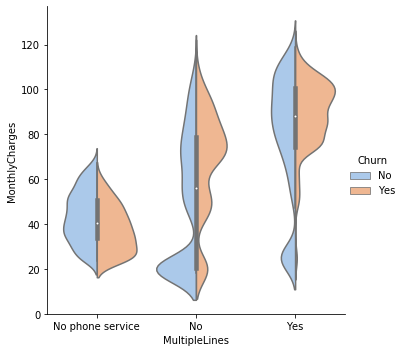

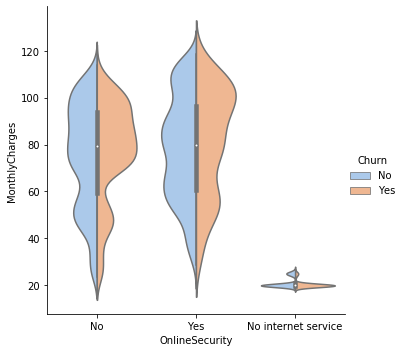

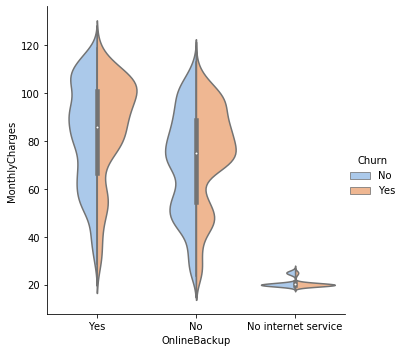

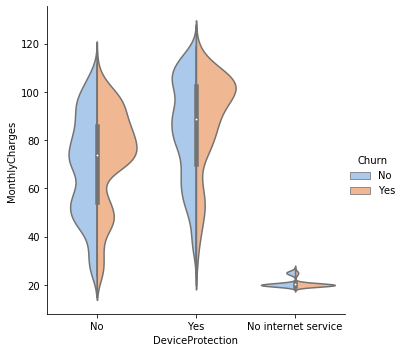

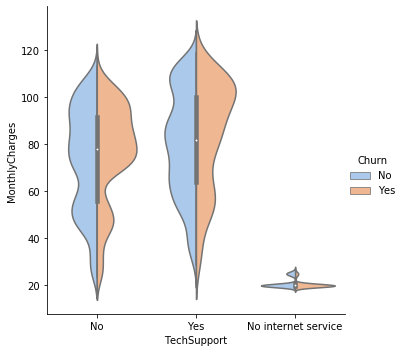

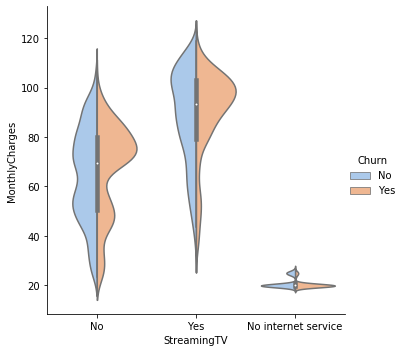

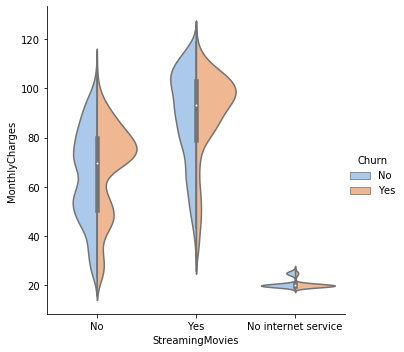

In [210]:
for col in deatail_serive:
    ax = fig.add_subplot(3,3,i)
    sns.catplot(x=col, y="MonthlyCharges", hue="Churn", kind="violin",split=True, 
                     palette="pastel", data=telco, ax= ax)

In [44]:
Customer_Services_1 =  ['PhoneService', 'MultipleLines']

print ('\033[1m{:50s}\033[0m \n'.format("Chi-Square Test Results - Phone Services"))
for col in Customer_Services_1:
    chi_square_test(col)

Chi-Square Test Results - Phone Services           

------- PhoneService ------ 
P-value = 0.3269

<Cross Table> 
               Churn               
Churn             No    Yes     All
PhoneService                       
No              9.88    9.1    9.67
Yes            90.12   90.9   90.33
All           100.00  100.0  100.00

------- MultipleLines ------ 
P-value = 0.0036

<Cross Table> 
                   Churn                
Churn                 No     Yes     All
MultipleLines                           
No                 49.12   45.43   48.14
No phone service    9.88    9.10    9.67
Yes                41.00   45.48   42.19
All               100.00  100.00  100.00



In [41]:
Customer_Services_2 =  ['InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection' , 'TechSupport' ,'StreamingTV', 'StreamingMovies']

print ('\033[1m{:50s}\033[0m \n'.format("Chi-Square Test Results - Internet Service"))
for col in Customer_Services_2:
    chi_square_test(col)

Chi-Square Test Results - Internet Service         

------- InternetService ------ 
P-value = 0.0

<Cross Table> 
                  Churn                
Churn                No     Yes     All
InternetService                        
DSL               37.90   24.56   34.36
Fiber optic       34.84   69.40   44.03
No                27.25    6.05   21.62
All              100.00  100.00  100.00

------- OnlineSecurity ------ 
P-value = 0.0

<Cross Table> 
                      Churn                
Churn                    No     Yes     All
OnlineSecurity                             
No                    39.43   78.17   49.73
No internet service   27.25    6.05   21.62
Yes                   33.31   15.78   28.65
All                  100.00  100.00  100.00

------- OnlineBackup ------ 
P-value = 0.0

<Cross Table> 
                      Churn                
Churn                    No     Yes     All
OnlineBackup                               
No                    35.91   65.97   43.90

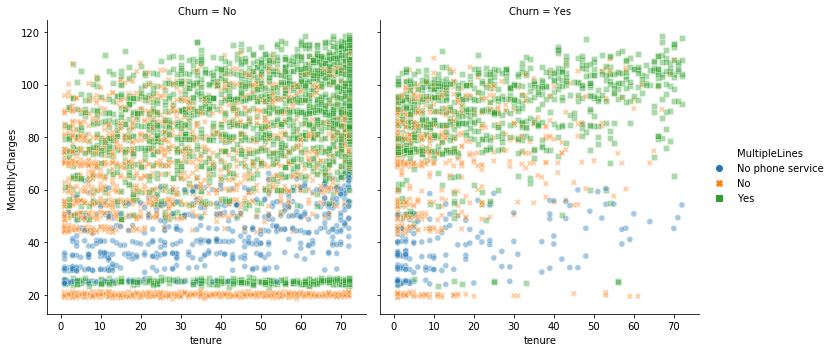

In [39]:
sns.relplot(x="tenure", y="MonthlyCharges", col="Churn", hue="MultipleLines",style='MultipleLines', 
            kind="scatter", data=telco, alpha = 0.4)
plt.show()

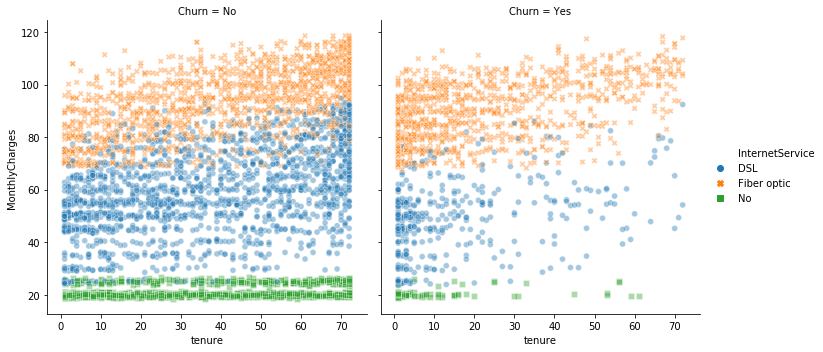

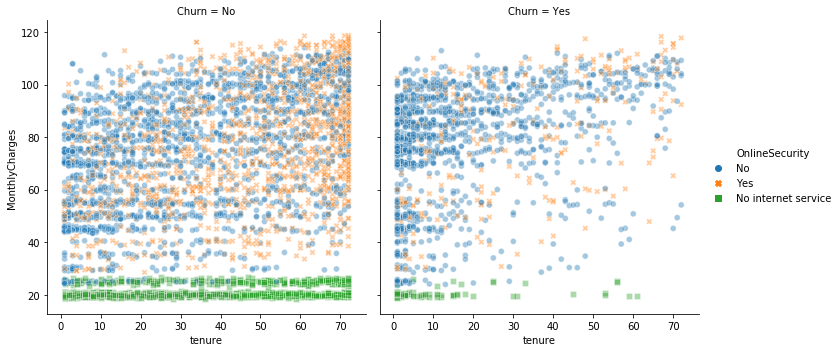

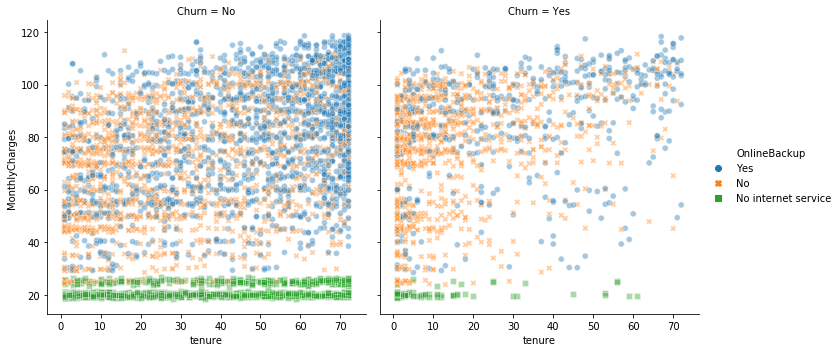

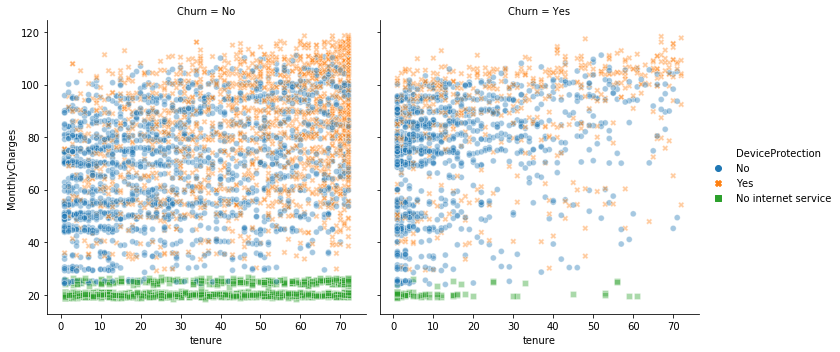

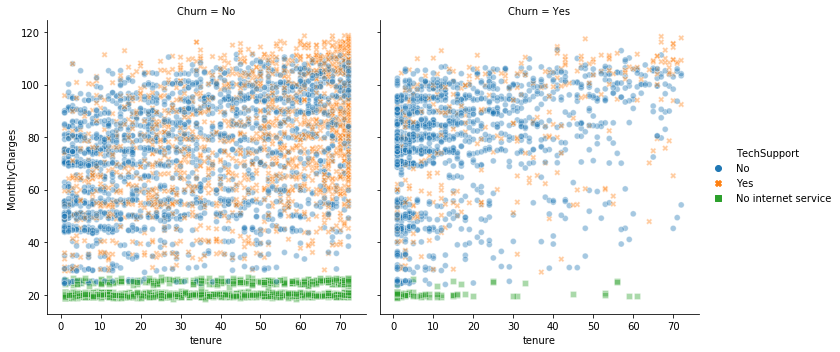

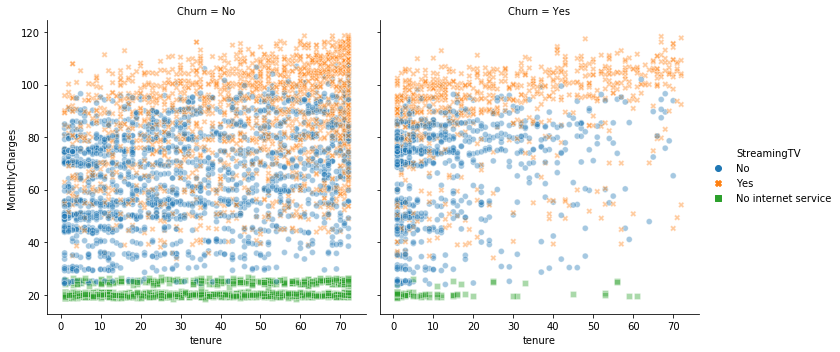

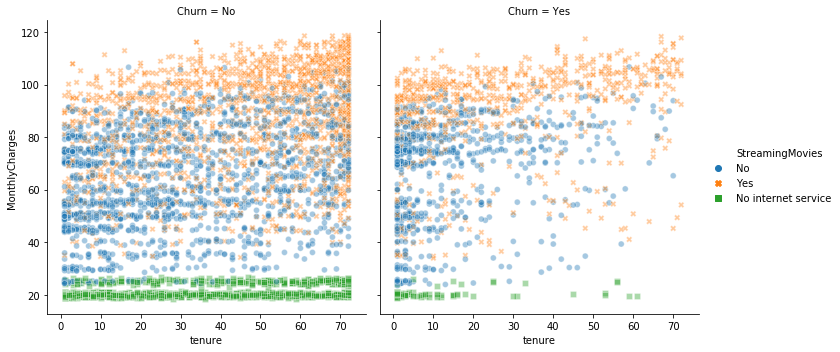

In [175]:
for col in Customer_Services_2:
    sns.relplot(x="tenure", y="MonthlyCharges", col="Churn", hue=col,style=col, 
            kind="scatter", data=telco, alpha = 0.4)
    plt.show()

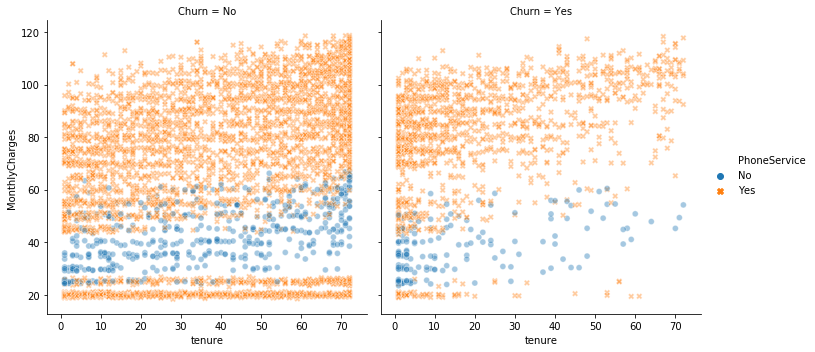

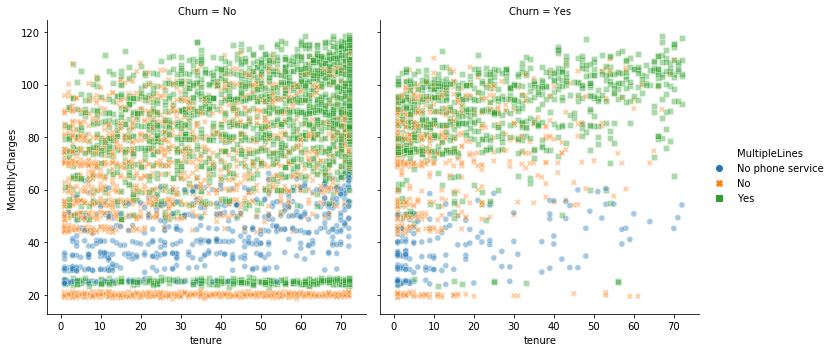

In [45]:
for col in Customer_Services_1:
    sns.relplot(x="tenure", y="MonthlyCharges", col="Churn", hue=col,style=col, 
            kind="scatter", data=telco, alpha = 0.4)
    plt.show()

### Summary
    - The chi-square test shows only the phone services is not statistical significant in the association with the churn.
    - In general, the group that people choose specific services have relative lower churn percentage.


## 4 Summary
<a id = "sum"></a>
 - We have explore the three main perspective - customer demographics, customer account information, customer services.
 - We also visualized features included multi-levels, which all gain valuable information.